In [1]:
import matplotlib.pyplot as plt
import numpy as np

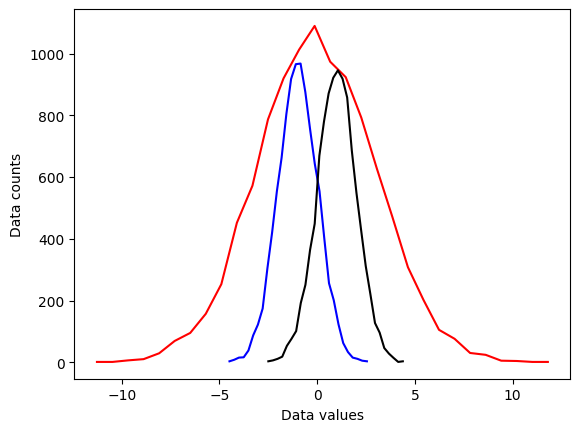

In [2]:
# create some data distributions

# the distributions
N     = 10001   # number of data points
nbins = 30      # number of histogram bins

d1 = np.random.randn(N)  - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1

# need their histograms
y1, x1 = np.histogram(d1, nbins)
x1 = (x1[1:] + x1[:-1]) / 2

y2, x2 = np.histogram(d2, nbins)
x2 = (x2[1:] + x2[:-1]) / 2

y3, x3 = np.histogram(d3, nbins)
x3 = (x3[1:] + x3[:-1]) / 2

# plot them
plt.plot(x1, y1, 'b')
plt.plot(x2, y2, 'r')
plt.plot(x3, y3, 'k')

plt.xlabel('Data values')
plt.ylabel('Data counts')

plt.show()

In [3]:
# side note

meanval = 10.2
stdval  = 7.5
numsamp = 123

# this
np.random.normal(meanval, stdval, numsamp)

# is equivalent to
np.random.randn(numsamp)*stdval + meanval

array([  0.81523657,  10.87899968,  11.835792  ,   9.33471743,
        10.68601047,  10.67979466,  14.92079163,  20.27660598,
         2.78801826,  16.35681454,  15.01887225,  -1.524907  ,
        15.19268747,   8.47803701,  14.42957355,   9.36994659,
        14.24447132,  15.45531412,   4.16183518,  12.99610435,
        25.08140831,  23.44103744,  -2.84967417,  20.83213169,
        20.86660175,   6.07303774,  14.51023065,   8.5020519 ,
        -1.91769419,  14.83585764,   9.88271073,  21.62986768,
        10.19156702,   5.5034507 ,   8.77045846,  17.32822117,
         4.5332852 ,   9.66356181,   4.23392283,   3.4167152 ,
        11.96753767,  10.80313185,  12.75460621,   5.81801093,
         5.2113647 ,   8.53756718,   9.95218755,  24.25375603,
        17.68660314,   9.6681432 ,  23.27957739,  15.41345037,
         7.5150179 ,  15.77553637,  10.03344423,  19.59330244,
       -10.42056262,  19.81207678,  16.3309786 ,   5.42338628,
        14.93886989,   9.61949347,   7.50767029,  10.54

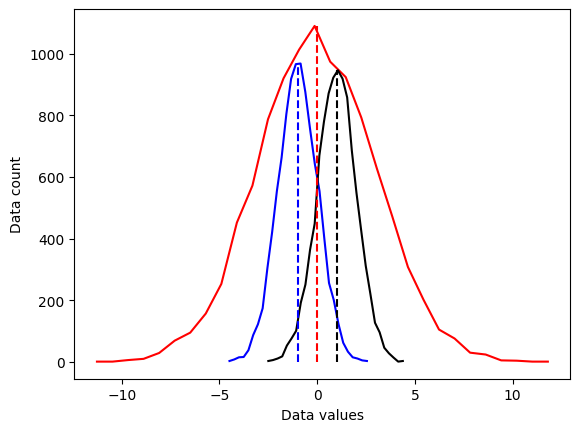

In [4]:
# overlay the mean

# compute the means
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1, y1, 'b', x2, y2, 'r', x3, y3, 'k')
plt.plot([mean_d1, mean_d1], [0, max(y1)], 'b--')
plt.plot([mean_d2, mean_d2], [0, max(y2)], 'r--')
plt.plot([mean_d3, mean_d3], [0, max(y3)], 'k--')

plt.xlabel('Data values')
plt.ylabel('Data count')
plt.show()

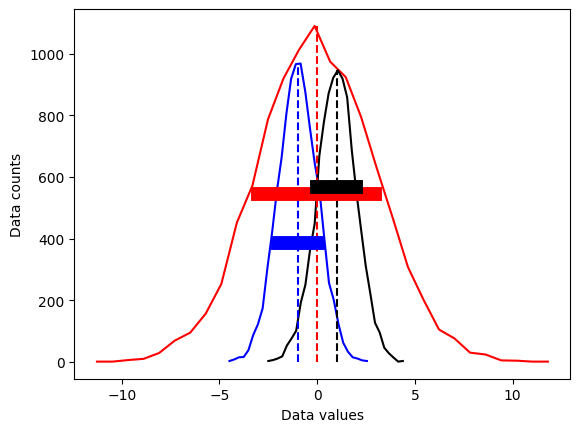

In [5]:
# now for the standard deviation

# initialize
stds = np.zeros(3)

# compute standard deviations
stds[0] = np.std(d1, ddof=1)
stds[1] = np.std(d2, ddof=1)
stds[2] = np.std(d3, ddof=1)

# same plot as earlier
plt.plot(x1, y1, 'b', x2, y2, 'r', x3, y3, 'k')
plt.plot([mean_d1, mean_d1], [0, max(y1)], 'b--', [mean_d2, mean_d2], [0, max(y2)], 'r--', [mean_d3, mean_d3], [0, max(y3)], 'k--')

# now add stds
plt.plot([mean_d1-stds[0], mean_d1 + stds[0]], [.4*max(y1), .4*max(y1)], 'b', linewidth=10)
plt.plot([mean_d2-stds[1], mean_d2+stds[1]], [.5*max(y2), .5*max(y2)], 'r', linewidth=10)
plt.plot([mean_d3-stds[2], mean_d3+stds[2]], [.6*max(y3), .6*max(y3)], 'k', linewidth=10)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

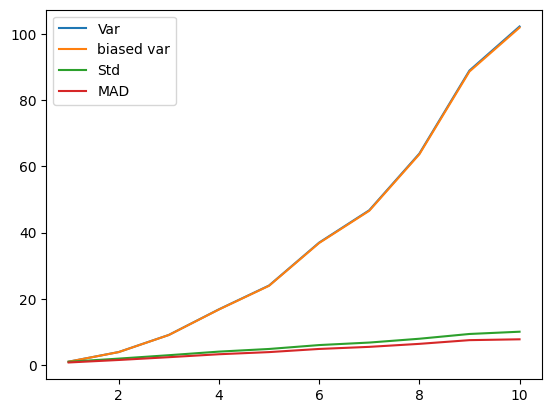

In [6]:
# different variance measures

variances = np.arange(1, 11)
N = 300

varmeasures = np.zeros((4, len(variances)))

for i in range(len(variances)):

    # create data and mean-center
    data = np.random.randn(N) * variances[i]
    datacent = data - np.mean(data)

    # variance
    varmeasures[0, i] = sum(datacent**2) / (N-1)

    # biased variance
    varmeasures[1, i] = sum(datacent**2) / N

    # standard deviation
    varmeasures[2, i] = np.sqrt(sum(datacent**2) / (N-1))

    # MAD (mean absolute difference)
    varmeasures[3, i] = sum(abs(datacent)) / (N-1)

# show them!
plt.plot(variances, varmeasures.T)
plt.legend(('Var', 'biased var', 'Std', 'MAD'))
plt.show()

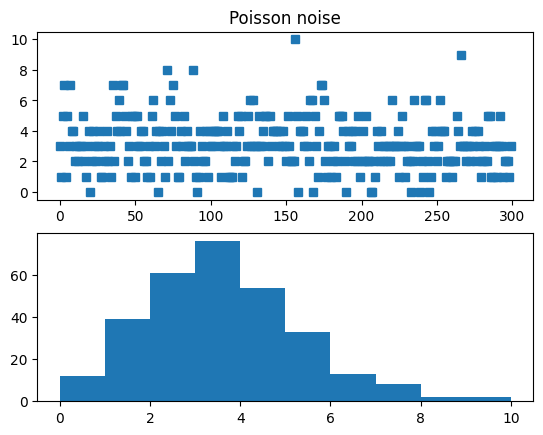

In [7]:
# Fano factor and coefficient of variation (CV)

# need positive-valued data (why?)
data = np.random.poisson(3, 300)    # "Poisson noise"

fig, ax = plt.subplots(2, 1)
ax[0].plot(data, 's')
ax[0].set_title('Poisson noise')

ax[1].hist(data)
plt.show()

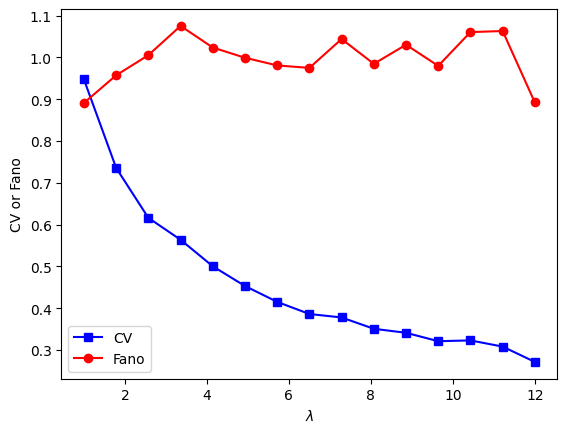

In [8]:
# compute fano factor and CV for a range of lambda parameters

# list of parameters
lambdas = np.linspace(1, 12, 15)

# initialize output vectors
fano = np.zeros(len(lambdas))
cv   = np.zeros(len(lambdas))

for li in range(len(lambdas)):
    
    # generate new data
    data = np.random.poisson(lambdas[li], 1000)

    # compute the metrics
    cv[li] = np.std(data) / np.mean(data)   # need ddof = 1 ?
    fano[li] = np.var(data) / np.mean(data)

# and plot
plt.plot(lambdas, cv, 'bs-')
plt.plot(lambdas, fano, 'ro-')
plt.legend(('CV', 'Fano'))
plt.xlabel('$\lambda$')
plt.ylabel('CV or Fano')
plt.show()